# <div style="text-align: center"> Introduction to Python and Machine Learning

## <div style="text-align: center">Machine Learning in Python (I) - Intro to ML


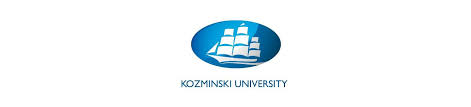

---

#### A great intro to Linear Regression in stats and in Machine Learning:
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [1]:
import os
import numpy as np
import pandas as pd

from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

%matplotlib inline
import statsmodels.formula.api as smf

<div class="alert alert-block alert-success">
⚠️TASK 1
<br>

1. Load the `automobile_price_data.csv` to `df` variable, and then 
2. clean the missing data (you should first delete the whole `normalized-loses` column),

</div>

In [24]:
df = pd.read_csv('automobile_price_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# del df['normalized-losses']

In [25]:
df = df.drop(columns=['normalized-losses'])

In [6]:
df.shape

(205, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [17]:
df.shape

(205, 25)

In [8]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [9]:
for col in df.columns:
    print(col, df[col].unique(), '\n')

symboling [ 3  1  2  0 -1 -2] 

make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo'] 

fuel-type ['gas' 'diesel'] 

aspiration ['std' 'turbo'] 

num-of-doors ['two' 'four' '?'] 

body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

drive-wheels ['rwd' 'fwd' '4wd'] 

engine-location ['front' 'rear'] 

wheel-base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1] 

length [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.

<div class="alert alert-block alert-success">
⚠️TASK 1.2
<br>

Drop the rows with the '?' value.

</div>

In [26]:
np.where(df['price'] == '?')[0]

array([  9,  44,  45, 129], dtype=int64)

In [27]:
for col in df.columns:
    df = df.drop(index=np.where(df[col] == '?')[0]).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [28]:
df.shape

(193, 25)

In [29]:
for col in df.columns:
    print(col, df[col].unique(), '\n')

symboling [ 3  1  2  0 -1 -2] 

make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo'] 

fuel-type ['gas' 'diesel'] 

aspiration ['std' 'turbo'] 

num-of-doors ['two' 'four'] 

body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

drive-wheels ['rwd' 'fwd' '4wd'] 

engine-location ['front' 'rear'] 

wheel-base [ 88.6  94.5  99.8  99.4 105.8 101.2 103.5 110.   88.4  93.7 103.3  95.9
  86.6  96.5  94.3  96.  113.  102.   93.1  98.8 104.9 106.7 115.6  96.6
 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2 107.9 114.2
 108.   89.5  99.1  93.3  97.   96.9  95.7  98.4 102.4 102.9 104.5  97.3
 104.3 109.1] 

length [168.8 171.2 176.6 177.3 192.7 176.8 189.  193.8 197.  141.1 155.9 158.8
 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7 172.6
 199.6 191.7 159.1 166.8 177.8 175.  190.9 187.5 202.6 1

In [ ]:
# # OR
# for col in df.columns:
#     df = df.drop(index=df[df[col] == '?'].index)

<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

3. check if the columns have proper types

</div>

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb-weight        193 non-null    int64  
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    object 
 15  engine-size        193 non-null    int64  
 16  fuel-system        193 non

In [31]:
df.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [32]:
df.iloc[0, :]

symboling                      3
make                 alfa-romero
fuel-type                    gas
aspiration                   std
num-of-doors                 two
body-style           convertible
drive-wheels                 rwd
engine-location            front
wheel-base                  88.6
length                     168.8
width                       64.1
height                      48.8
curb-weight                 2548
engine-type                 dohc
num-of-cylinders            four
engine-size                  130
fuel-system                 mpfi
bore                        3.47
stroke                      2.68
compression-ratio              9
horsepower                   111
peak-rpm                    5000
city-mpg                      21
highway-mpg                   27
price                      13495
Name: 0, dtype: object

In [33]:
pd.DataFrame({'type': df.dtypes, 'value': df.iloc[0, :]})

,type,value
symboling,int64,3
make,object,alfa-romero
fuel-type,object,gas
aspiration,object,std
num-of-doors,object,two
body-style,object,convertible
drive-wheels,object,rwd
engine-location,object,front
wheel-base,float64,88.6
length,float64,168.8


In [34]:
df = df.astype(dtype={'price': 'int32', 
                      'bore': 'float16', 
                      'stroke': 'float16', 
                      'horsepower': 'int32', 
                      'peak-rpm': 'int32'})

In [36]:
df.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float16
stroke               float16
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [31]:
type(df['price'][0])

str

<div class="alert alert-block alert-warning">
📺 READ AT HOME
<br>

More about creating categorical columns:
[Handling Categorical Data in Python](https://www.datacamp.com/community/tutorials/categorical-data)

</div>

<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

4. use the `train_test_split()` function to randomize data split and set the parameter `test_size=0.25` and 
5. carry out a prediction model using linear regression. Use 3 chosen features (columns) as predictors (X), and the `price` column as a target column (Y).

</div>

In [37]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [38]:
df.columns = df.columns.astype(str).str.replace("-", "_")

In [39]:
df.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [41]:
X = df[['horsepower', 'bore', 'compression_ratio']]
y = df['price']

In [43]:
X

,horsepower,bore,compression_ratio
0,111,3.470703,9.0
1,111,3.470703,9.0
2,154,2.679688,9.0
3,102,3.189453,10.0
4,115,3.189453,8.0
...,...,...,...
188,114,3.779297,9.5
189,160,3.779297,8.7
190,134,3.580078,8.8
191,106,3.009766,23.0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [45]:
X_train

,horsepower,bore,compression_ratio
139,62,3.050781,9.0
45,262,3.539062,11.5
66,175,3.779297,8.0
187,162,3.619141,7.5
190,134,3.580078,8.8
...,...,...,...
181,88,3.189453,9.0
173,85,3.189453,9.0
73,145,3.580078,7.0
8,140,3.130859,8.3



<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

6. In the end, use the `ols` library, loaded above, to create a regression model and check its coefficients and R-squared.

</div>

In [46]:
lm_model_1 = ols(formula='price ~ horsepower + bore + compression_ratio', data=df).fit()

In [47]:
lm_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     165.7
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.16e-52
Time:                        14:29:07   Log-Likelihood:                -1885.6
No. Observations:                 193   AIC:                             3779.
Df Residuals:                     189   BIC:                             3792.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.764e+04   4142.555     -4.259      0.000   -2.58e+04   -9469.708
horsepower          173.7626     10.241     16.967      0.000     153.561     193.964
bore               2393.8250   1398.290      1.712      0.089    -364.434    5152.084
compression_ratio   490.1994     80.102      6.120      0.000     332.190     648.209
==============================================================================
Omnibus:                       39.988   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.723
Skew:                           0.964   Prob(JB):                     6.60e-19
Kurtosis:                       5.587   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


<div class="alert alert-block alert-success">
⚠️TASK 5
<br>

7. Use the train_test_split data to create a Linear Regression model, and visualise the actual price and the predicted price.

</div>

In [49]:
import sklearn
sklearn.__version__

'0.22.1'

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
model_predict = model.predict(X_test)

In [52]:
X_test

,horsepower,bore,compression_ratio
143,62,3.050781,9.00
147,56,3.269531,22.50
11,121,3.310547,9.00
26,88,3.339844,8.50
136,82,3.619141,9.00
39,101,3.150391,9.00
162,73,3.269531,22.50
117,207,3.740234,9.50
176,100,3.189453,10.00
77,88,3.349609,8.50


In [51]:
model_predict

array([ 4777.1609252 , 11767.98034846, 16002.07892486,  9774.68651116,
        9503.101057  , 12058.78477326, 14858.77356001, 32745.48234199,
       12519.4440003 ,  9793.4100992 , 15911.91971335, 18831.09711199,
        6531.00569874, 20792.31019499, 15911.91971335, 11767.98034846,
       27116.66135525,  5941.52619166, 21866.65902592, 23366.16734256,
       13486.19329377,  4777.1609252 , 13486.19329377, 12615.57397714,
       23530.85413508, 10559.27645662,  9224.69727927, 12883.06673107,
       23821.18152886, 11684.83744162, 18831.09711199, 15911.91971335,
       16002.07892486, 15911.91971335,  6497.52679849,  5941.52619166,
       11222.78093656,  5947.20195406, 22400.35289161, 23321.149949  ,
        7696.52589646,  6531.00569874, 15854.96035217, 14037.78154084,
       21866.65902592, 11392.26521158, 32745.48234199, 11213.81691056,
       14037.78154084])

In [53]:
model_predict_df = pd.DataFrame({'Horsepower': X_test.horsepower, 'compression_ratio': X_test.compression_ratio, 'bore': X_test.compression_ratio,'Actual Price': y_test, 'Predicted Price': model_predict})
model_predict_df.reset_index(drop = True, inplace=True)

In [56]:
model_predict_df.head()

,Horsepower,compression_ratio,bore,Actual Price,Predicted Price
0,62,9.0,9.0,8778,4777.160925
1,56,22.5,22.5,7788,11767.980348
2,121,9.0,9.0,20970,16002.078925
3,88,8.5,8.5,8921,9774.686511
4,82,9.0,9.0,8013,9503.101057


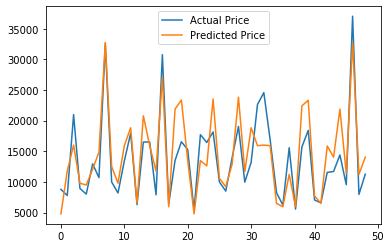

In [57]:
model_predict_df[['Actual Price', 'Predicted Price']].plot()

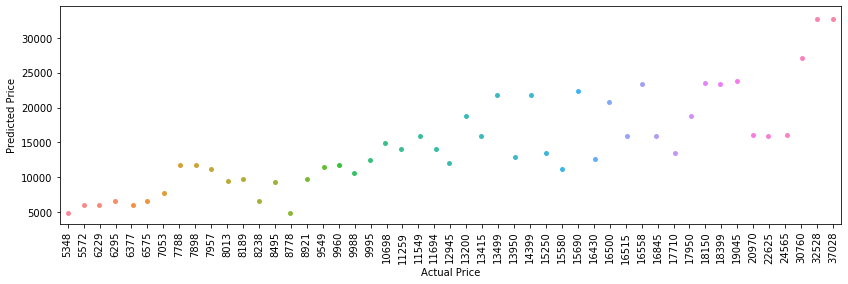

In [62]:
plt.figure(figsize=(14,4))
sns.stripplot(model_predict_df['Actual Price'], model_predict_df['Predicted Price'])
plt.xticks(rotation=90);

In [63]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(model_predict_df['Actual Price'], model_predict_df['Predicted Price'])))

Root Mean Squared Error: 3813.3559696483667


In [67]:
from sklearn.metrics import r2_score
print('R-squared:', r2_score(model_predict_df['Actual Price'], model_predict_df['Predicted Price']))

R-squared: 0.6959088670801251


---

Creating a better model, using better predictors.

In [66]:
df.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [68]:
X = df[['horsepower', 'engine_size']]
y = df['price']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
model_predict = model.predict(X_test)

In [73]:
model_predict_df = pd.DataFrame({'Horsepower': X_test.horsepower, 'engine_size': X_test.engine_size, 'Actual Price': y_test, 'Predicted Price': model_predict})
model_predict_df.reset_index(drop = True, inplace=True)

In [74]:
model_predict_df.head()

,Horsepower,engine_size,Actual Price,Predicted Price
0,86,110,10295,10032.185217
1,102,109,13950,10556.712606
2,86,110,8845,10032.185217
3,95,120,15580,11828.786904
4,145,156,14489,19029.908069


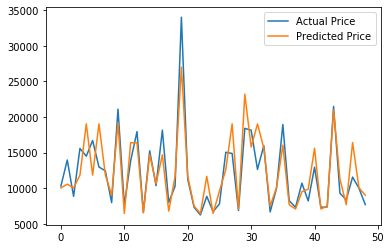

In [75]:
model_predict_df[['Actual Price', 'Predicted Price']].plot()

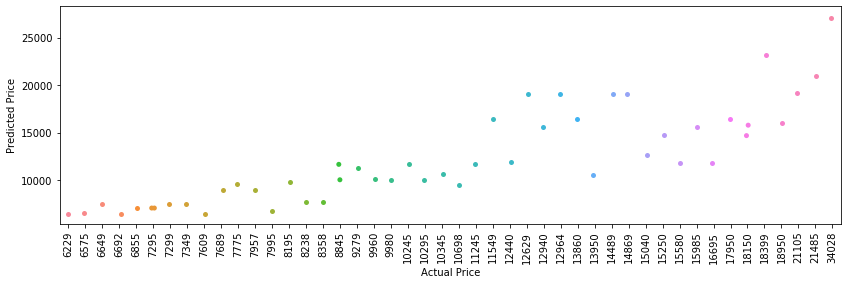

In [76]:
plt.figure(figsize=(14,4))
sns.stripplot(model_predict_df['Actual Price'], model_predict_df['Predicted Price'])
plt.xticks(rotation=90);

In [77]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(model_predict_df['Actual Price'], model_predict_df['Predicted Price'])))

Root Mean Squared Error: 2649.932084215063


In [78]:
from sklearn.metrics import r2_score
print('R-squared:', r2_score(model_predict_df['Actual Price'], model_predict_df['Predicted Price']))

R-squared: 0.7476323847916788


---

# Machine Learning with Titanic

In machine learning, we are more interested in anticipation than in understanding data dependencies.
Imagine that we are thinking about a Titanic II journey - before we decide to travel we would like to know if we have a chance to survive it. It is more important for us to accurately predict our chances of survival, even at the cost of understanding why the model we are using returns a certain prediction. Therefore, machine learning often uses much more complex models than in classical statistics and does not describe the effects in terms of their relevance, but the correctness of our predictions.  
Most often in machine learning we simulate prediction by dividing data into two sets - training and test.<br><br>
**The training set** is the data we use to match our model. **Test set** is data for which we check how accurate our predictions are. The division into a test set and a training set is made randomly, but we usually want the training set to be larger - to have enough data to match the model well. The size of the test set limits only the resolution with which we will measure the correctness of the prediction (e.g. 10 cases in the test set means that the resolution with which we will measure the correctness is 1/10, i.e. 10%).<br><br>
The most popular machine learning package (without complex neural networks) is `scikit-learn`, in short `sklearn`. This package has a very rich [documentation](http://scikit-learn.org/stable/index.html).
First we will load only the function to divide the data into test and training data and the model we will use - logistic regression:

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic = sns.load_dataset('titanic')

## Transforming data
The main difference between `statsmodels` and `sklearn` is that `sklearn` uses a matrix, not a dataframe, so in the last preprocessing step we will change our dataframe into a matrix. Earlier we will have to replace columns containing category data (such as `who`) with dichotomous variables. The `who` column has for example three categories - we will change it into two zero-one (dichotomous) columns (we don't need three columns in this case - the third one would carry redundant information in relation to the two previous ones). To replace category columns with dichotomous ones we will use the function `pd.get_dummies`.  
  
Let's first remember how our data looks like:

In [54]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


First let's take the continuous columns: pclass (ticket class), age (age), sibsp (number of siblings or spouses on board), parch (number of parents / children on board), fee (fare):

<div class="alert alert-block alert-success">
⚠️TASK 6
<br>

Select only pclass (ticket class), age (age), sibsp (number of siblings or spouses on board), parch (number of parents / children on board), fee (fare) columns and create a new DataFrame `titanic_selected`.

</div>

In [55]:
titanic_selected = 

In [56]:
titanic_selected.head(6)

,pclass,age,sibsp,parch,fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
5,3,NaN,0,0,8.4583


You can also pay attention to the value in the second column, the last row, above: 'NaN' (from *Not a Number*) is no data. We will deal with the deficiencies later.  
Next, let's see how we can deal with columns with category variables. Let's deal with gender first: the `sex` column. Use the `pd.get_dummies` column to specify sex and use `drop_first=True` to get one column less than the number of categories (to avoid redundant information):

In [57]:
titanic.sex[:6]

0      male
1    female
2    female
3    female
4      male
5      male
Name: sex, dtype: object

In [58]:
sx = pd.get_dummies(titanic.sex, drop_first=True)
sx[:6]

,male
0,1
1,0
2,0
3,0
4,1
5,1


In [59]:
titanic.who[:6]

0      man
1    woman
2    woman
3    woman
4      man
5      man
Name: who, dtype: object

In [60]:
child = pd.get_dummies(titanic.who)
child[:6]

,child,man,woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0


We can use `pd.get_dummies()` to extract several category variables from the dataframe in one go and re-code them into regression-friendly variables (you can learn more about this by searching google for 'dummy coding', or you use the link above with the additional reading). 

<div class="alert alert-block alert-success">
⚠️TASK 7
<br>

We want to select the `sex`, `alone` and `who` columns with `pd.get_dummies`, complete the `columns=` argument accordingly (if you have problems, check the documentation `pd.get_dummies` for the `columns` argument):

</div>

In [61]:
titanic_with_dummies = 

In [62]:
titanic_with_dummies.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,sex_male,alone_True,who_man,who_woman
0,0,3,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,1,0,1,0
1,1,1,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,0,0,0,1
2,1,3,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,0,1,0,1
3,1,1,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,0,0,0,1
4,0,3,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,1,1,1,0


Unfortunately, `pd.get_dummies()` returns the whole original dataframe to us with new columns showing added variables, while we only want the converted ones. Therefore, after using the `get_dummies` we select the converted columns ourselves using the `.loc` method.

<div class="alert alert-block alert-success">
⚠️TASK 8
<br>

Use the `.loc` dataframe method of `titanic_with_dummies` by selecting all rows and all columns starting with `sex_male`. Save the resulting dataframe in the `titanic_only_dummies` variable.

</div>

In [63]:
# you can use .iloc()


,sex_male,alone_True,who_man,who_woman
0,1,0,1,0
1,0,0,0,1
2,0,1,0,1
3,0,0,0,1
4,1,1,1,0
...,...,...,...,...
886,1,1,1,0
887,0,1,0,1
888,0,0,0,1
889,1,1,1,0


OR

In [64]:
titanic_only_dummies = 

In [65]:
titanic_only_dummies.head()

,sex_male,alone_True,who_man,who_woman
0,1,0,1,0
1,0,0,0,1
2,0,1,0,1
3,0,0,0,1
4,1,1,1,0


<div class="alert alert-block alert-success">
⚠️TASK 9
<br>

We can now merge two dataframes (`titanic_selected` and `titanic_only_dummies`) together using the function `pd.concat()`. The name of this function comes from *concatenate*, i.e. combine, assemble. We use the name argument `axis=1` to merge the dataframes in the column axis (the first axis `axis=0` is the row, the second axis `axis=1` is the column).

</div>

In [66]:
titanic_preproc = 

In [67]:
titanic_preproc.head(6)

,pclass,age,sibsp,parch,fare,sex_male,alone_True,who_man,who_woman
0,3,22.0,1,0,7.2500,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,1
2,3,26.0,0,0,7.9250,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,1,1,0
5,3,NaN,0,0,8.4583,1,1,1,0


The rest of the columns will be of no interest to us (at least for the time being).  
We can still get rid of the missing values. The simplest thing we can do is:  
* throw out all the lines (rows) with any missing data in them
* Missing data in a given column could be replaced e.g., by an average of this column.

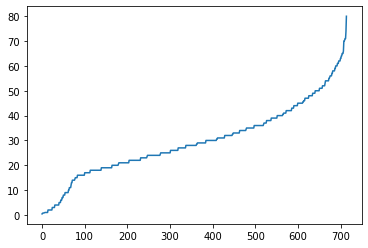

In [68]:
titanic_preproc.sort_values('age').reset_index(drop=True).age.plot()

In [69]:
titanic_preproc.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_male        0
alone_True      0
who_man         0
who_woman       0
dtype: int64

In [70]:
titanic_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      891 non-null    int64  
 1   age         714 non-null    float64
 2   sibsp       891 non-null    int64  
 3   parch       891 non-null    int64  
 4   fare        891 non-null    float64
 5   sex_male    891 non-null    uint8  
 6   alone_True  891 non-null    uint8  
 7   who_man     891 non-null    uint8  
 8   who_woman   891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 38.4 KB


<div class="alert alert-block alert-success">
⚠️TASK 10
<br>

We'll use the second method. First we use the `.mean()` dataframe method to get the average of each column, and then we use `.fillna()` - a method that allows you to replace data gaps with selected values. The `fillna` method will give the averages obtained.

</div>

In [72]:
titanic_preproc = 

In [73]:
titanic_preproc.head(6)

,pclass,age,sibsp,parch,fare,sex_male,alone_True,who_man,who_woman
0,3,22.000000,1,0,7.2500,1,0,1,0
1,1,38.000000,1,0,71.2833,0,0,0,1
2,3,26.000000,0,0,7.9250,0,1,0,1
3,1,35.000000,1,0,53.1000,0,0,0,1
4,3,35.000000,0,0,8.0500,1,1,1,0
5,3,29.699118,0,0,8.4583,1,1,1,0


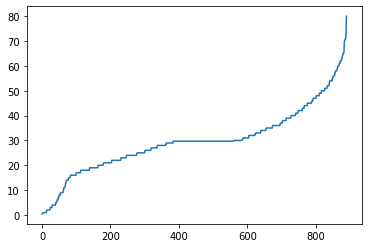

In [74]:
titanic_preproc.sort_values('age').reset_index(drop=True).age.plot()

This is the end of the transformations! We can reward ourselves with a picture of a fragment of our data.
(In the example below, we use `.values` to get to the data matrix, dropping the dataframe shell, i.e. column and row names; we also use `zscore` to standardize the columns (i.e. to standardize "along the rows" `axis=0`):

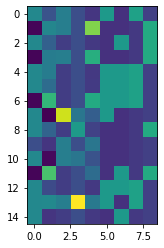

In [75]:
from scipy.stats import zscore

data = titanic_preproc.values[:15, :]
data = zscore(data, axis=0)
plt.imshow(data, cmap='viridis')

### Saving the data in our folder

In [109]:
titanic_preproc.to_csv('titanic_preproc.csv')

## Dividing into training and test data

We are interested in survival prediction, i.e. the `survived` column, we will save it in the numpy format in the variable `y`.

<div class="alert alert-block alert-success">
⚠️TASK 11
<br>

Save the values of the `survived` column in the `y` variable. Remember to get to the `.values` parameter of a given column - this way you can extract data without the columns and rows, i.e. a simple numbered matrix.

</div>

In [76]:
y = 

In [77]:
titanic.shape

(891, 15)

In [78]:
titanic_preproc.shape

(891, 9)

<div class="alert alert-block alert-success">
⚠️TASK 12
<br>

Fill in the missing fields. Remember that `titanic_preproc` is a dataframe, and `train_test_split` is a matrix we want to specify.<br><br>
We divide our data (`titanic_preproc`) and the dependent variable (`y`) into a test and a training set. We want the test set to be 30% of all data, and the training set to be 70%, additionally we give `random_state=42` to make the random draw the same even if we restart this notebook (and therefore it'll be the same between different computers).

</div>

In [79]:
X_train, X_test, y_train, y_test = 

In [80]:
X_train.shape

(623, 9)

In [81]:
X_test.shape

(268, 9)

In [82]:
y_train.shape

(623,)

In [83]:
y_test.shape

(268,)

First, let's see how the prediction for the two variables we used earlier in building the statistical model works: the class and the who_man. Let's remember which are the columns in our matrix (we know this because we created a list of column names `columns` on the fly):

In [84]:
print(titanic_preproc.columns)

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'alone_True',
       'who_man', 'who_woman'],
      dtype='object')


First and penultimate column - we will now select them for both training and test data:

In [85]:
xtr = X_train[:, [0, -2]]
xts = X_test[:, [0, -2]]

## We're predicting (using two variables for now)

We use logistic regression (previously loaded function `LogisticRegression`) - first we create a classifier (logistic regression):

In [86]:
logistic_model = LogisticRegression()

Now we use the `.fit()` method of classifying the classifier to match it to the training data:
* xtr, a matrix containing two columns with a date_matrix
* Train passenger experience information (corresponding to the following lines from the date of the matrix)

In [87]:
logistic_model.fit(xtr, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We can then generate predictions for test data (`xts`) using the `.predict` method:

In [88]:
predictions = logistic_model.predict(xts)

In [89]:
predictions[:8]

array([0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [90]:
y_test[:8]

array([1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [91]:
(predictions == y_test)[:8]

array([False,  True,  True,  True,  True,  True,  True,  True])

Predictions are simply zeroes and ones, corresponding to the assessment "will not survive" (0) and "will survive" (1). We can now compare them with the actual fate of the passengers in the test set (`y_test`). We compare `predictions` with `y_test` using identity (`==`), which gives us a list (namely a vector) of zeroes and ones - zeroes where the prediction does not match the actual fate, one where the prediction is accurate. Averaging this list gives us the average correctness of the prediction of our model:

In [92]:
accuracy = (predictions == y_test).mean()
print('The correctness of the prediction of our model is:', accuracy)

The correctness of the prediction of our model is: 0.7947761194029851


79% is pretty good, that's almost 80% of correct predictions based on only two variables. Before we go any further, we will try to understand better what logistic regression based on these two variables does. For this purpose, we will draw on a single chart points corresponding to the passengers (using colours to indicate whether they survived or not). The x-axis of this chart will be the ticket class, while the y-axis will represent whether the passenger is a man (a non-child, but we are not talking here about the state of mind):

<div class="alert alert-danger">
Brace yourself! 
The code that appears in the two cells below to prepare the charts can look like magic for you, you don't have to understand it at all. It is only important to understand the chart.
</div>

Text(0.5, 0, 'pclass')

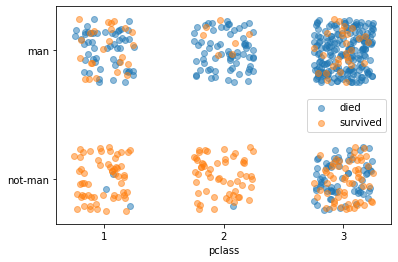

In [93]:
alive = y_train == 1
x = xtr + np.random.rand(*xtr.shape) * 0.5 - 0.25

plt.scatter(x[~alive, 0], x[~alive, 1], alpha=0.5, label='died')
plt.scatter(x[alive, 0], x[alive, 1], alpha=0.5, label='survived')

plt.xticks([1, 2, 3])
plt.yticks([0, 1], ['not-man', 'man'])
plt.legend(loc='best')
plt.xlabel('pclass')

Note that the points are scattered for legibility, actually each point occupies only one of the six positions (3 on the x-axis * 2 on the y-axis).  
Logistic regression divides this two-dimensional space by a straight line in order to separate the living from the mature as much as possible.

Text(0.5, 0, 'pclass')

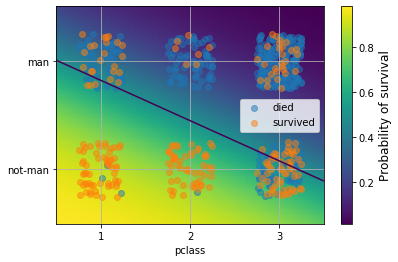

In [94]:
xx = np.linspace(0.5, 3.5, 100)
yy = np.linspace(-0.5, 1.5, 100).T
xx, yy = np.meshgrid(xx, yy)
full_grid = np.c_[xx.ravel(), yy.ravel()]

prob = logistic_model.predict_proba(full_grid)[:, 1].reshape((100, 100))

img = plt.imshow(prob, extent=[0.5, 3.5, -0.5, 1.5], origin='lower', cmap='viridis', aspect='auto')

plt.scatter(x[~alive, 0], x[~alive, 1], alpha=0.5, label='died')
plt.scatter(x[alive, 0], x[alive, 1], alpha=0.5, label='survived')

plt.contour(xx, yy, prob, levels=[0.5])

plt.xticks([1, 2, 3])
plt.yticks([0, 1], ['not-man', 'man'])
plt.legend(loc='best', frameon=True, fancybox=True)
plt.grid('off')
cbar = plt.colorbar(img)
cbar.ax.set_ylabel('Probability of survival', fontsize=12)

plt.xlabel('pclass')

We can see that logistic regression assigns the probability of belonging to the "survival" class to points in the two-dimensional space above. - colour-coded (from black through navy blue and green to yellow). The black line is the decision line of logistic regression on this line, the right similarity of belonging to the living and dead is equal. Above this line the probability of survival is less than 50% (we see it in dark color), below - more than 50% (light color). This line is arranged in such a way that it suggests that our success in predicting (79% correctness) is due only to the use of the variable `who_man` (the line is diagonal but separates men from nonmen, not classes - remember that point scattering is only a visual effect, actually each of the point clouds is located at one data point).  


You can check this by matching a model that uses only one variable:

In [95]:
xtrain = X_train[:, [0, -2]]
xtest = X_test[:, [0, -2]]

logistic_model.fit(xtrain, y_train)
predictions = logistic_model.predict(xtest)

accuracy = (predictions == y_test).mean()
print('The correctness of the prediction of our model is:', accuracy)

The correctness of the prediction of our model is: 0.7947761194029851


<div class="alert alert-block alert-success">
⚠️TASK 13
<br>

Now use more features (columns) to predict survival. (in the above model we're using only 1 predictor and 1 target variables (columns).

</div>

In [96]:
titanic_preproc2 = 